<a href="https://colab.research.google.com/github/Carlosrbrj/ML---ROI/blob/main/Modelo_de_ML_Ativa%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto ML - Valor de ativações

DS: Carlos Júnior

Date: 26/06/2024

# 1. Estruturação do Projeto

**Objetivo**
A principal motivação desse estudo é entender quais são os principais componentes que influenciam os resultados das ativações a partir dos dados que temos disponíveis. Com isso, iremos construir um modelo de ML capaz de prever o resultado final de uma ativação a partir de alguns inputs de dados.

Sendo assim, com base na revisão de dados e construção da hipótese de relação, os atributos que irão compor esse dataset está determinado abaixo e a query de consulta salva em outro repositório.


*  Id - Id da ativação
*  Name - Nome da ativação
*  Start_date - Data do início da ativação
*  Total_pessoas_ativadas - número de pessoas que receberam as mensagens em cada ativação
*  Valor_total_compras - Valor total gerado pelas ativações
*  Vendas_identificadas - número de vendas identificadas
*  Avg_days_since_last_purchase - é o número médio de dias que os clientes da lista de ativação estavam sem comprar antes da data fim de analyse_until.


# 2 - Anáise exploratória de dados

Para dar início a análise exploratória de dados, o bloco de código abaixo importa todos os pacotes que irei usar nesse projeto, além de desativar as notificações de "warnings".

In [1]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Importação de pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
import missingno as ms # para tratamento de missings
from sklearn.preprocessing import MinMaxScaler # normalização
from sklearn.preprocessing import StandardScaler # padronização
from sklearn.preprocessing import OrdinalEncoder # ordinal encoding
from sklearn.preprocessing import OneHotEncoder # one-hot encoding e dummy encoding

O bloco de código abaixo da carga nos dados que usaremos nessa análise. Aqui, devido à gestão de informação dos dados, o dataset será salvo apenas na minha máquina.

In [2]:
# Esse é o link que será o caminho público do arquivo que montamos.

link_csv = '/content/Teste - 1900 - algoritmo.csv'

In [3]:
# Lê o arquivo
dataset = pd.read_csv(link_csv, encoding='latin-1')

# Mostra as 10 primeiras linhas do dataset
dataset.head(10)

,id,name,start_date,total_pessoas_ativadas,valor_total_compras,Vendas_identificadas,avg_days_since_last_purchase
0,3386,Panizza 60-90 produto,2023-09-29,11,NaN,0,NaN
1,3387,panizza 91-130 produto,2023-09-29,9,NaN,0,NaN
2,3388,Panizza 131-180 produto,2023-09-29,8,663.00,4,267.000000
3,3396,60-180 aÃ§Ã£o 500 reais,2023-09-29,27,NaN,0,NaN
4,3404,PANIZZA quase perdidos 100-102,2023-09-30,28,503.50,2,266.000000
5,3405,panizza quase perdidos 103-105,2023-09-30,25,360.40,2,258.000000
6,3406,panizza quase perdidos 106-108,2023-09-30,20,212.00,2,263.000000
7,3407,panizza quase eprdidos 109=111,2023-09-30,36,603.00,3,261.666667
8,3408,panizza quase perdidos 97-99,2023-09-30,9,104.67,1,269.000000
9,3409,panizza quase perdidos 93-96,2023-09-30,12,NaN,0,NaN


## 1.2 Análise descritiva

Uma vez carregado o dataset, vamos entender quais são suas características de construção, como sua dimensão e informações.

In [4]:
# Mostra as dimensões do dataset
dataset.shape

(137, 7)

In [5]:
# Mostra as informações do dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            137 non-null    int64  
 1   name                          137 non-null    object 
 2   start_date                    137 non-null    object 
 3   total_pessoas_ativadas        137 non-null    int64  
 4   valor_total_compras           94 non-null     float64
 5   Vendas_identificadas          137 non-null    int64  
 6   avg_days_since_last_purchase  94 non-null     float64
dtypes: float64(2), int64(3), object(2)
memory usage: 7.6+ KB


Com essa primeira análise, podemos observar que foram feitas 137 ativações por esse único cliente. Além disso, dessas, apenas 94 tiveram algum valor total em compras, portanto, 43 ativações não geraram nenhum resultado.
Além disso, desde já, sabemos que haverá necessidade de realizar um tratamento na base de dados, que será feito antes das análises uni e multivariadas.

### 1.2.1 - Estatísticas Descritivas

o bloco de código abaixo análise as estatísticas descritivas do dataset.

In [6]:
# Obtendo as estatísticas descritivas
dataset.describe()

,id,total_pessoas_ativadas,valor_total_compras,Vendas_identificadas,avg_days_since_last_purchase
count,137.000000,137.000000,94.000000,137.000000,94.000000
mean,4297.321168,526.094891,28108.796596,113.744526,139.207881
std,566.085331,1042.039685,55554.791728,293.493011,104.434852
min,3386.000000,1.000000,104.670000,0.000000,2.000000
25%,3657.000000,5.000000,1801.025000,0.000000,17.015267
50%,4711.000000,64.000000,6164.345000,11.000000,172.718868
75%,4773.000000,563.000000,31616.265000,80.000000,235.026152
max,5001.000000,6540.000000,315306.910000,1982.000000,269.000000


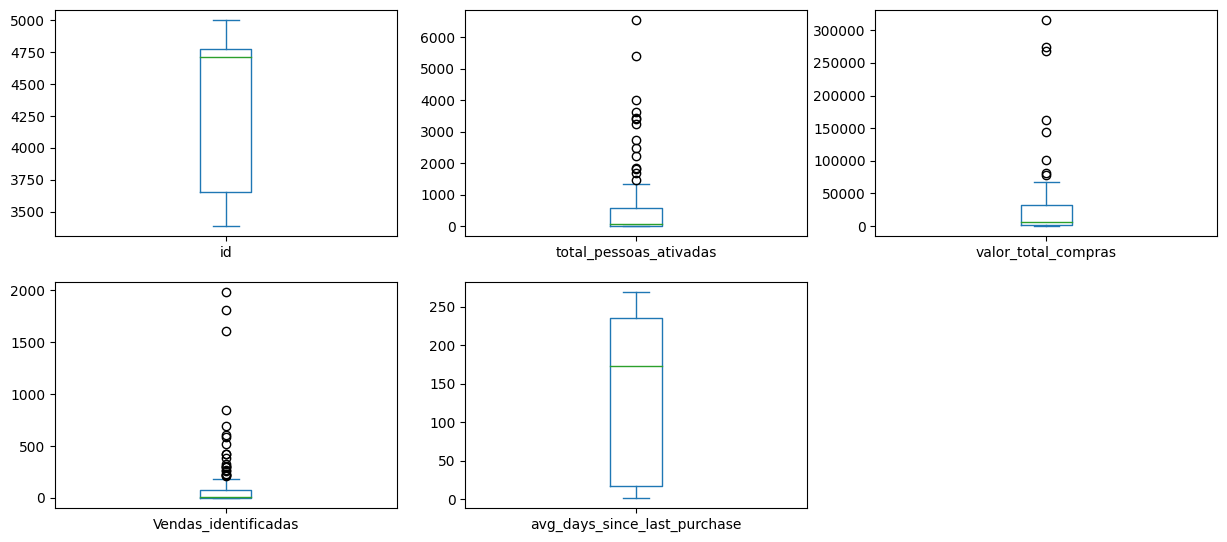

In [7]:
# Boxplot
dataset.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,10))
plt.show()

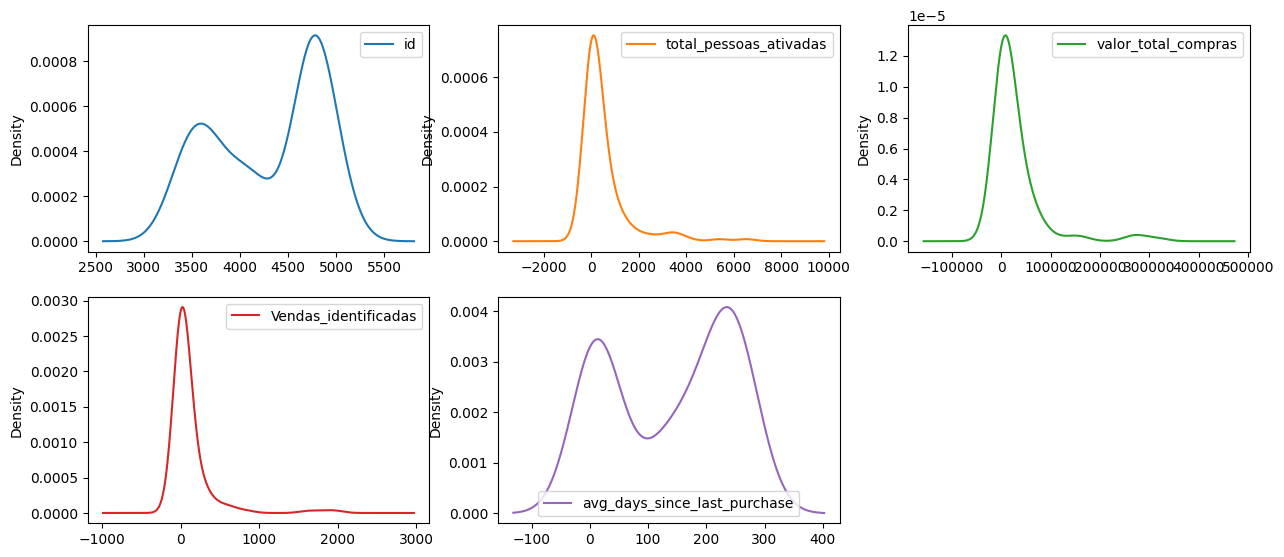

In [8]:
# Density Plot
dataset.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False, figsize = (15,10))
plt.show()

A partir dessas informações, podemos observar os seguintes pontos:

1.   Valor médio gerado por ativação: 28.108
2.   Tempo médio sem comprar: 139 dias
3.   Vendas média identificadas: 113
4.   A média de dias sem comprar das pessoas ativadas tem dois picos na sua distribuição, caracterizando uma distribuição bimodal, o que pode ser interpretado como uma mistura de duas populações.





# 3 - Pré-processamento de dados

Por já termos identificado que existem valores nulos que precisam ser tratados, essa seção se dedicará a identificar e tratar esses valores quando for necessário.
Sendo assim, o bloco de código abaixo verifica a quantidade de nulls e cria um novo para tratamento.

In [9]:
# verificando nulls no dataset
dataset.isnull().sum()

id                               0
name                             0
start_date                       0
total_pessoas_ativadas           0
valor_total_compras             43
Vendas_identificadas             0
avg_days_since_last_purchase    43
dtype: int64

<Axes: >

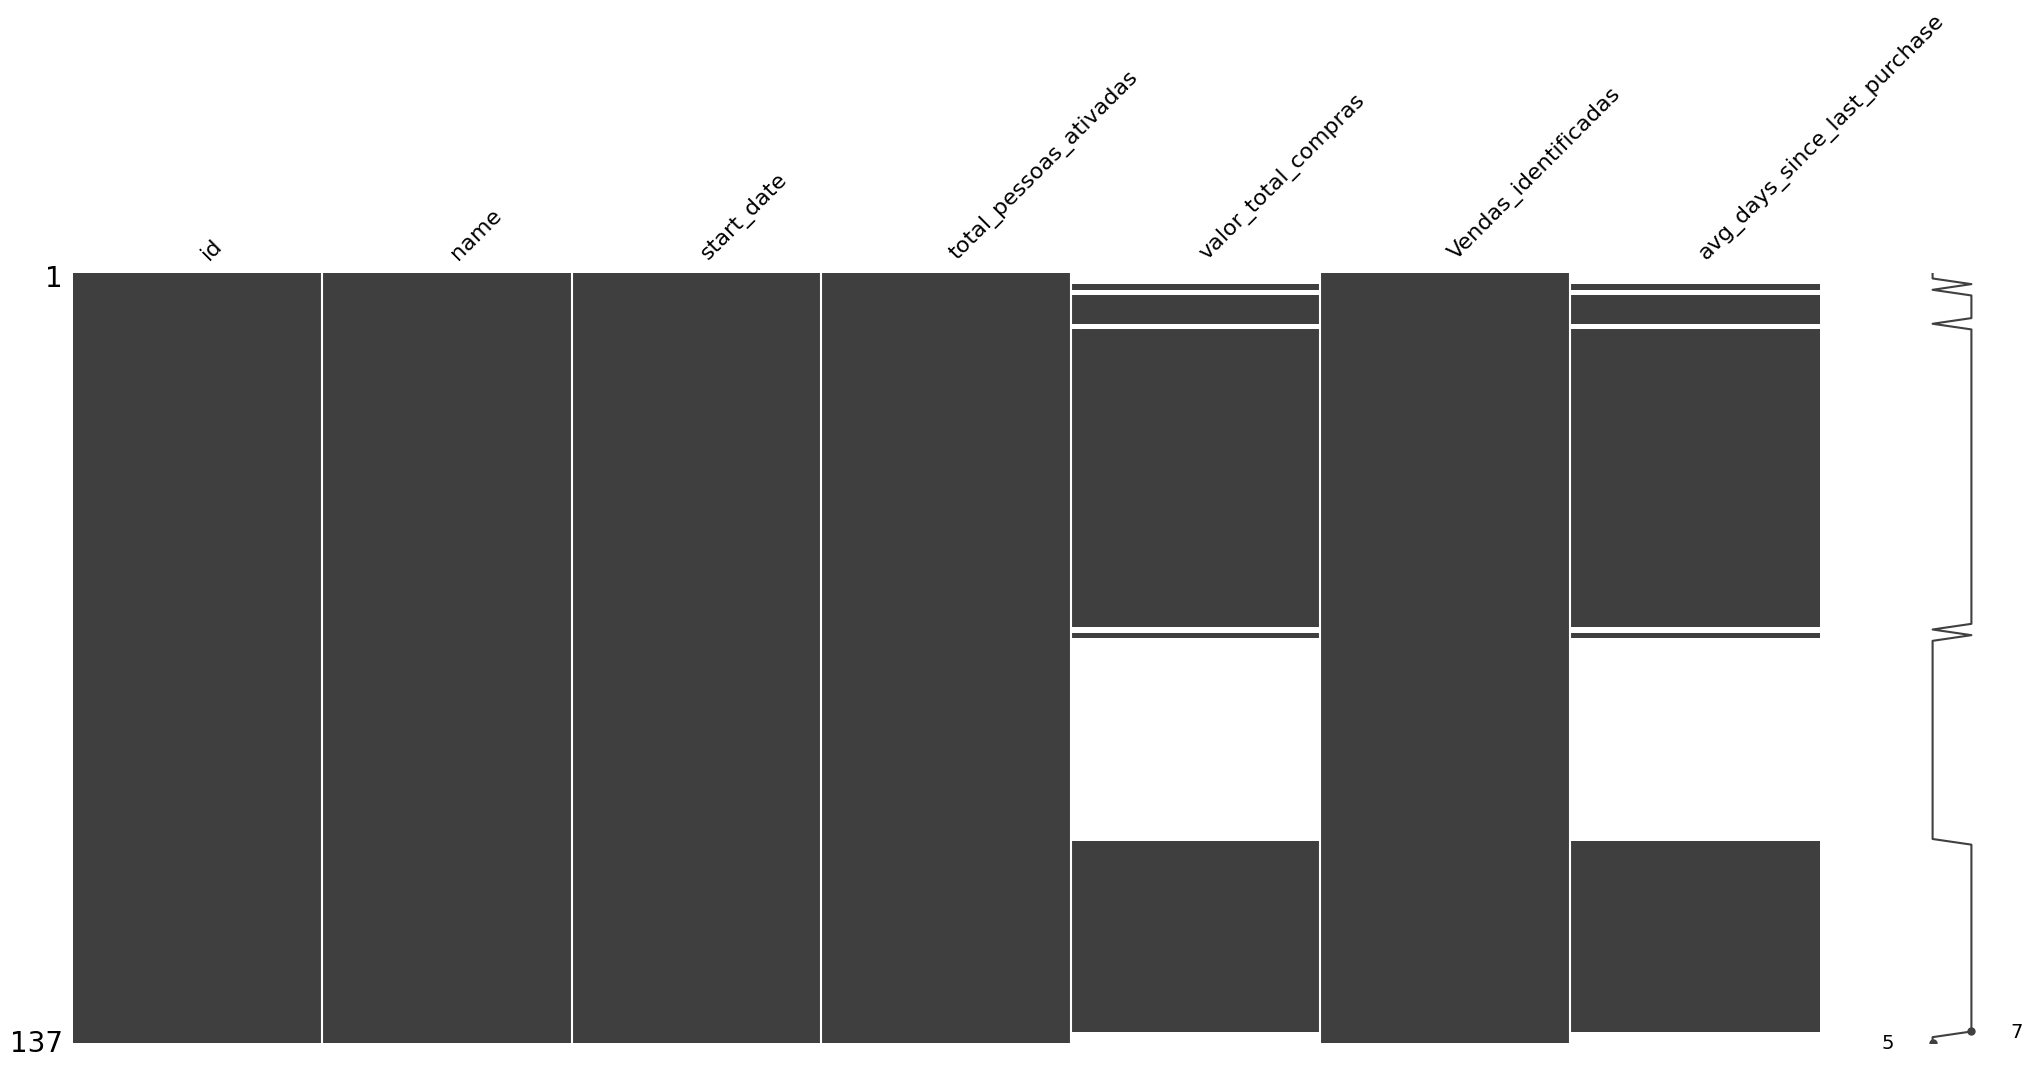

In [10]:
# Criando novo dataset para tratamento de missings com todas as colunas
col = list(dataset.columns)

# o novo dataset irá conter todas as colunas
datasetSM = dataset[col[:]]

# exibindo visualização matricial da nulidade do dataset
ms.matrix(datasetSM)

Para criar um dataset sem missings, iremos substituir todas as entradas que estão em NA nos atributos Valor_total_compras e avg_days_since_last_purchase por zero.

id                                       int64
name                                    object
start_date                      datetime64[ns]
total_pessoas_ativadas                   int64
valor_total_compras                    float64
Vendas_identificadas                     int64
avg_days_since_last_purchase           float64
dtype: object
0   2023-09-29
1   2023-09-29
2   2023-09-29
3   2023-09-29
4   2023-09-30
Name: start_date, dtype: datetime64[ns]


<Axes: >

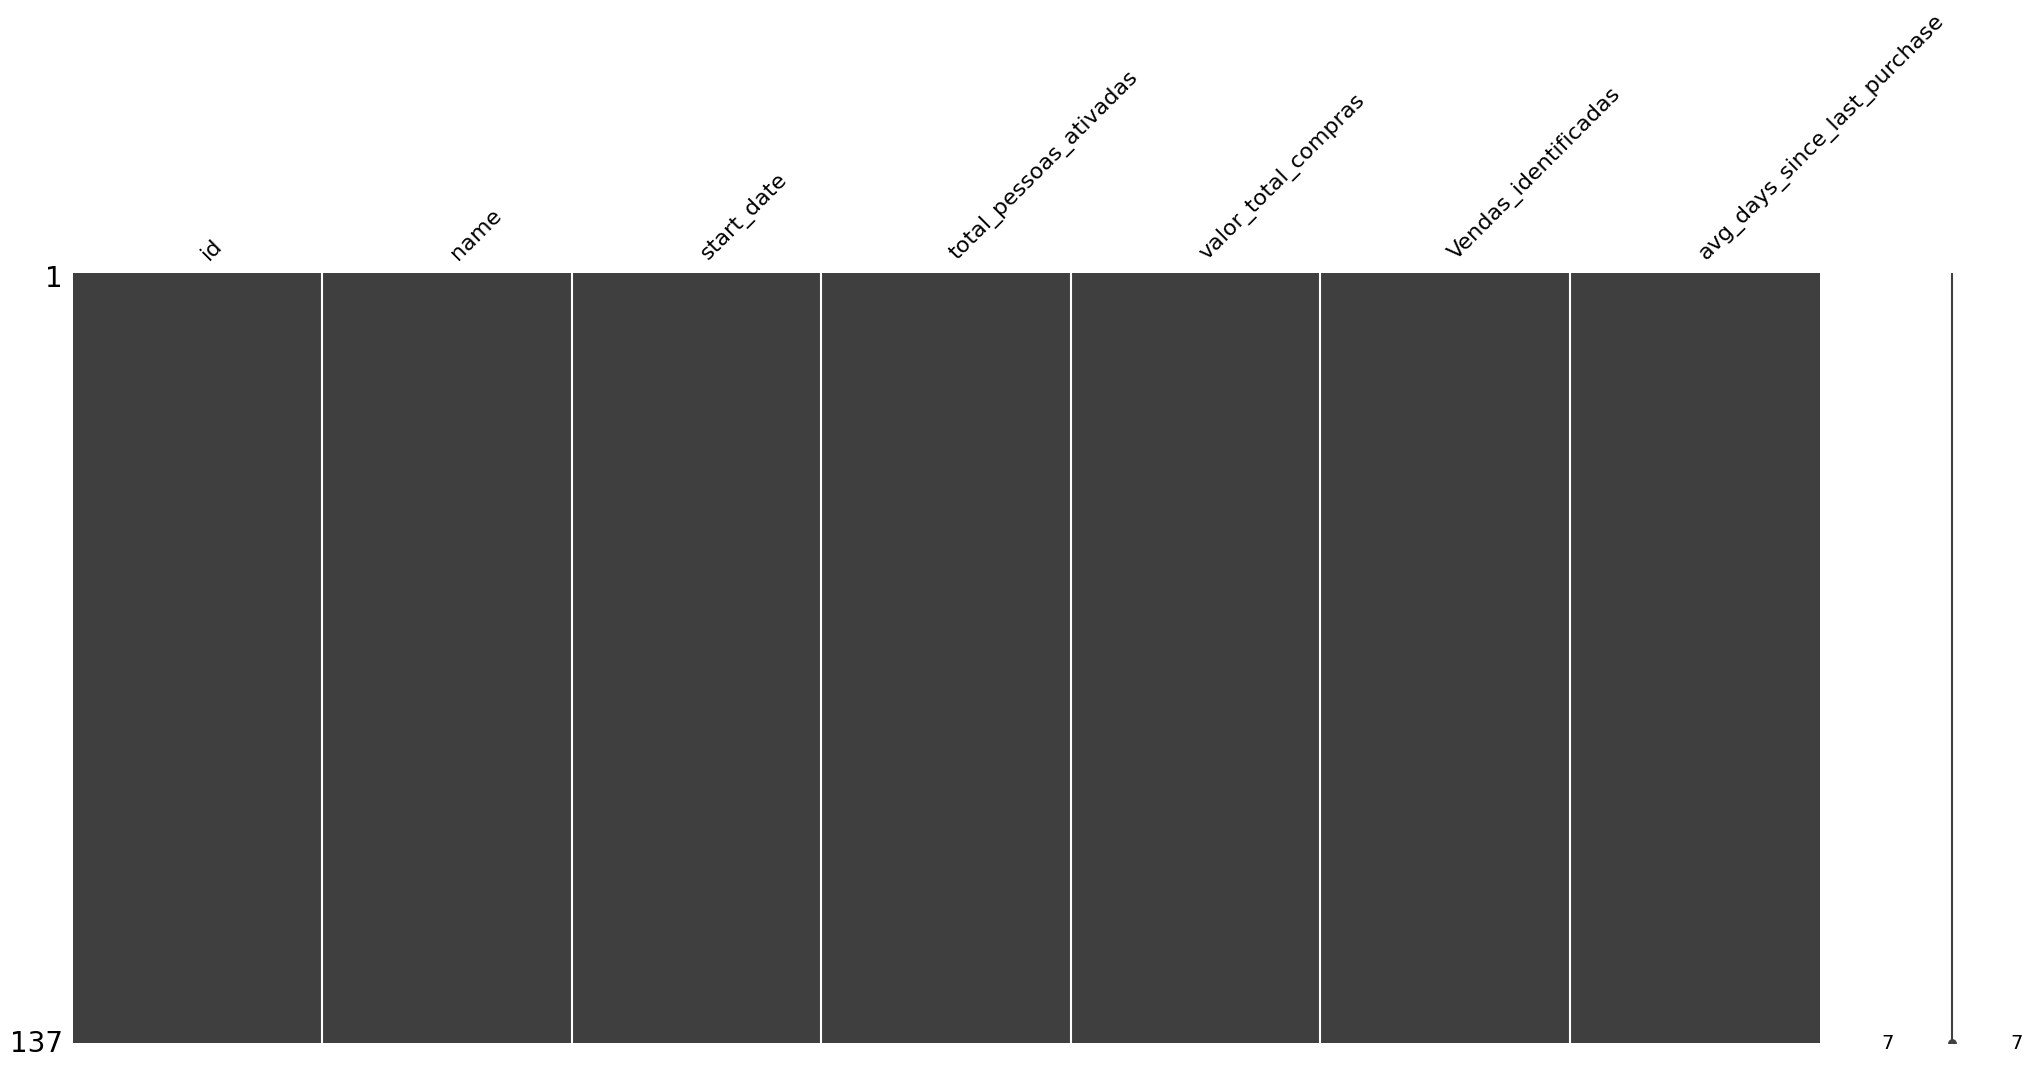

In [14]:
# substituindo os NaN de 'valor_total_compras' e 'avg_days_since_last_purchase' por 0 - voltando aos valores originais destas colunas
datasetSM['valor_total_compras'].fillna(0, inplace=True)
datasetSM['avg_days_since_last_purchase'].fillna(0, inplace=True)

# Convertendo a coluna 'date' para datetime
datasetSM['start_date'] = pd.to_datetime(datasetSM['start_date'])

# Verificando o resultado
print(datasetSM.dtypes)  # Para verificar os tipos de dados das colunas
print(datasetSM['start_date'].head())  # Para visualizar as primeiras linhas da coluna

# exibindo visualização matricial da nulidade do dataset
ms.matrix(datasetSM)

A partir desse novo dataset, as próximas seções serão dedicadas às análises multimodais e relacionais.

# 4 - Análises Multimodais

A análise das visualizações multimodais permite entender como os atributos interagem entre si. Para isso, iremos verificar a covariância entre as variáveis númericas do dataset a partir do coeficiente de correlação de Pearson atráves da matriz de correlação, que segue a seguinte lógica:


*   Próximo de -1 - Há uma correlação negativa entre as variáveis;
*   Próximo a +1 - Existe uma correlçaõ positiva entre as variáveis;
*   0: Não existe correlação entre as variávies.


Para iniciar as visualizações multimodais, vamos converter os atributos string em float.

In [21]:
# Criando novo dataset para exclusão de variáveis do tipo string
col = list(datasetSM.columns)

# o novo dataset irá conter todas as colunas
DatasetVM = datasetSM[col[:]]

In [23]:
# removendo as colunas 'Name' e 'start_date', 'vendas_identificadas'
DatasetVM.drop(['name', 'start_date', 'Vendas_identificadas'], axis=1, inplace= True)

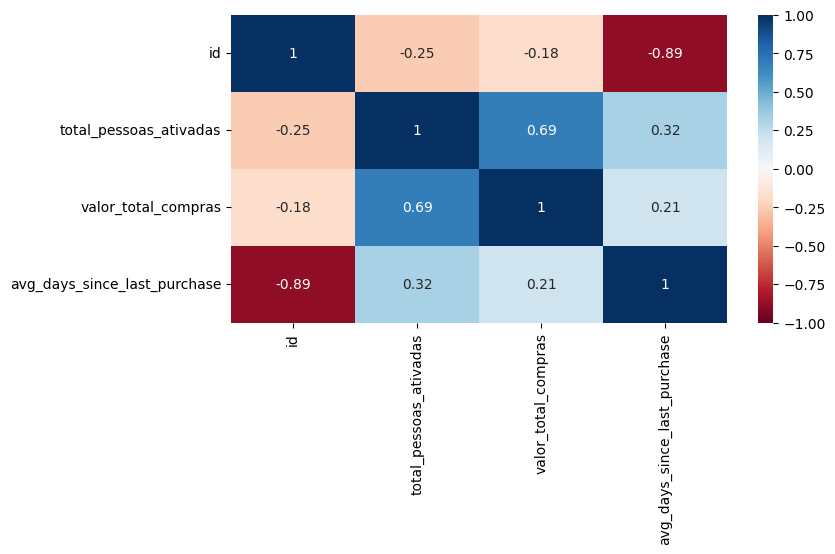

In [24]:
# Matriz de Correlação com Seaborn
plt.figure(figsize = (8,4))
sns.heatmap(DatasetVM.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1);

In [25]:
# Mostra as informações do dataset
DatasetVM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            137 non-null    int64  
 1   total_pessoas_ativadas        137 non-null    int64  
 2   valor_total_compras           137 non-null    float64
 3   avg_days_since_last_purchase  137 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 4.4 KB


De maneira geral, o resultado é um pouco supreendente. Em relação ao valor total impactado pelas ativações, podemos afirmar que o número total de pessoa ativados é a correlação mais forte, sugerindo que, quanto maior o número de pessoas ativadas, maior tende a ser o resultado em vendas impactadas pela ativação. Além disso, o tempo médio sem comprar também é atributo importante, indicando que, quanto mais distante os cliente estiverem da sua última compra, maior tende a ser o resultado gerado pelas ativações.

# 5 - Análise de componentes principais

A análise de componentes principais é uma técnica da estatística multivariada que consiste em transformar um conjunto de variáveis originais em outro conjunto de variáveis de mesma dimensão denominadas de componentes principais.

In [26]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

Variância explicada pelos componentes principais: [0.66215556 0.33784444]


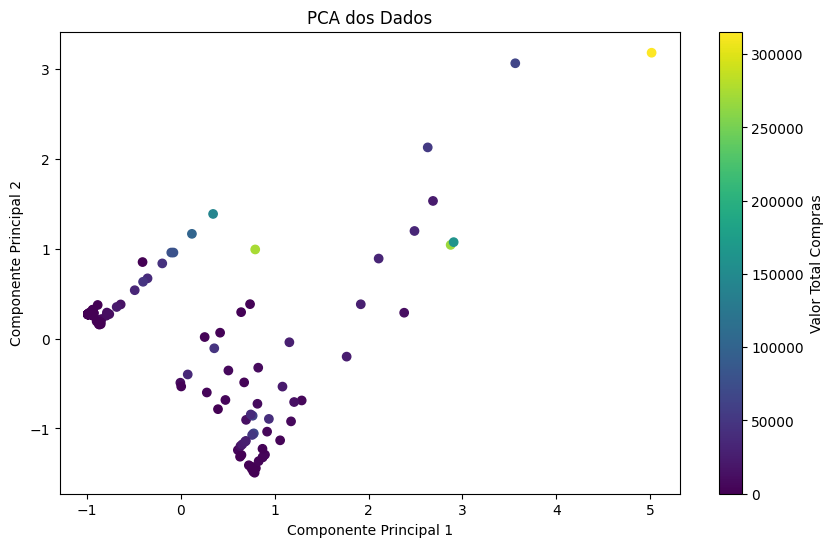

In [28]:
# Separando as variáveis explicativas (X) e a variável explicada (y)
X = DatasetVM[['total_pessoas_ativadas', 'avg_days_since_last_purchase']]
y = DatasetVM['valor_total_compras']

# Padronizando as variáveis explicativas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicando PCA
pca = PCA(n_components=2)  # número de componentes principais que você deseja
X_pca = pca.fit_transform(X_scaled)

# Criando um DataFrame com os componentes principais
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

# Adicionando a variável explicada ao DataFrame de PCA
df_pca['valor_total_compras'] = y.values

# Visualizando a variância explicada pelos componentes principais
explained_variance = pca.explained_variance_ratio_
print(f'Variância explicada pelos componentes principais: {explained_variance}')

# Plotando os componentes principais
plt.figure(figsize=(10, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['valor_total_compras'], cmap='viridis')
plt.colorbar(label='Valor Total Compras')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA dos Dados')
plt.show()

**Interpretação**

Sobre as cores dos pontos nos gráficos:
*  A cor dos pontos representa o valor_total_compras. O gradiente de cores varia do roxo (valores mais baixos) ao amarelo (valores mais altos).

*  Observando o gradiente de cores, você pode identificar padrões ou agrupamentos relacionados ao valor_total_compras. Por exemplo, pontos amarelos representam observações com altos valores de valor_total_compras.

Com isso, podemos observar que os pontos em que existem agrupamentos, todos são da mesma cor, predominantemente. Ou seja, estão associados ao mesmo valor de compras. Portanto, ativações com valores mais baixos são melhores explicados do ativações com valores mais altos.

**Variação explicada**

A variação explicada mostra o quanto um componente principal explica a vairação total dos dados. Sendo assim, podemos observar que os dois componente explicam 100% das variações, portanto, são suficientes para seguirmos com o modelo de ML.

# 6 - Modelo de Machine Learning

Nessa seção, nosso objetivo é construir um modelo de aprendizado de máquina supervisionado que tem como objetivo criar predições do valor total gerado por período usando os demais atributos do dataset.
Para isso, dividimos esse seção em três partes:

1. Seleção das variáveis indepedentes (modelos de Feature selection) e construção do Dataset
2. Modalagem - selecionaremos os melhores modelos de ML
3. Inferência e apresentação de resultados

In [29]:
# Verificar as colunas e suas posições atuais
print("Colunas antes da mudança:")
print(DatasetVM.columns)

Colunas antes da mudança:
Index(['id', 'total_pessoas_ativadas', 'valor_total_compras',
       'avg_days_since_last_purchase'],
      dtype='object')


In [30]:
# Nome da coluna que você quer mover
coluna_para_mover = DatasetVM.columns[2]

# Remover a coluna da posição atual
coluna_dados = DatasetVM.pop(coluna_para_mover)

# Inserir a coluna na nova posição desejada
DatasetVM.insert(3, coluna_para_mover, coluna_dados)

# Verificar as colunas e suas novas posições
print("\nColunas após a mudança:")
print(DatasetVM.columns)


Colunas após a mudança:
Index(['id', 'total_pessoas_ativadas', 'avg_days_since_last_purchase',
       'valor_total_compras'],
      dtype='object')


In [31]:
# Separação em bases de treino e teste (holdout)
array = DatasetVM.values
X = array[:,1:3] # atributos
y = array[:,3] # target

In [32]:
#importanto pacotes necessários

from sklearn.ensemble import ExtraTreesClassifier # ExtraTrees, para a Importância de Atributos
from sklearn.feature_selection import SelectKBest # para a Seleção Univariada
from sklearn.feature_selection import f_classif # para o teste ANOVA da Seleção Univariada
from sklearn.feature_selection import RFE # para a Eliminação Recursiva de Atributos
from sklearn.linear_model import LogisticRegression # Regressão Logística, para a Eliminação Recursiva de Atributos
import matplotlib.pyplot as plt
import numpy as np

In [33]:
# SelectKBest

# Seleção de atributos com SelectKBest
best_var = SelectKBest(score_func=f_classif, k='all')

# Executa a função de pontuação em (X, y) e obtém os atributos selecionados
fit = best_var.fit(X, y)

# Reduz X para os atributos selecionados
features = fit.transform(X)

# Resultados
print('\nNúmero original de atributos:', X.shape[1])
print('\nNúmero reduzido de atributos:', features.shape[1])

# Exibe os atributos orginais
print("\nAtributos Originais:", DatasetVM.columns[1:3])

# Exibe as pontuações de cada atributos e os 4 escolhidas (com as pontuações mais altas)
np.set_printoptions(precision=3) # 3 casas decimais
print("\nScores dos Atributos Originais:", fit.scores_)
print("\nAtributos Selecionados:", best_var.get_feature_names_out(input_features=DatasetVM.columns[1:3]))


Número original de atributos: 2

Número reduzido de atributos: 2

Atributos Originais: Index(['total_pessoas_ativadas', 'avg_days_since_last_purchase'], dtype='object')

Scores dos Atributos Originais: [90.222    inf]

Atributos Selecionados: ['total_pessoas_ativadas' 'avg_days_since_last_purchase']


Como esperado, todos os atriubutos são suficientes para explicar as variações no valor total gerado.

## 6.1 - Modelagem

Nessa seção iremos criar o dataset que usaremos no modelo de ML. Sendo assim, usaremos a conclusões da seção anterior. Depois, iremos dividir essa base de dados em treino e teste e, por fim, identificar o melhor melhor algoritmo de previsão.

### 6.1.1 - Modelos Simples de ML

Aqui, iremos usar os algoritmos mais simples de ML e avaliar seus resultados.

In [34]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes # para importar o dataset diabetes
from sklearn.model_selection import train_test_split # para particionar em bases de treino e teste (holdout)
from sklearn.model_selection import KFold # para preparar os folds da validação cruzada
from sklearn.model_selection import cross_val_score # para executar a validação cruzada
from sklearn.metrics import mean_squared_error # métrica de avaliação MSE
from sklearn.linear_model import LinearRegression # algoritmo Regressão Linear
from sklearn.linear_model import Ridge # algoritmo Regularização Ridge
from sklearn.linear_model import Lasso # algoritmo Regularização Lasso
from sklearn.neighbors import KNeighborsRegressor # algoritmo KNN
from sklearn.tree import DecisionTreeRegressor # algoritmo Árvore de Regressão
from sklearn.svm import SVR # algoritmo SVM

In [35]:
# Preparação dos dados

# Separação em bases de treino e teste (holdout)
array = DatasetVM.values
X = array[:,1:3] # atributos
y = array[:,3] # (target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7) # faz a divisão

# Criando os folds para a validação cruzada
num_particoes = 10 # número de folds da validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7) # faz o particionamento em 10 folds

LR: MSE 1706454063.20 (1482160423.85) - RMSE 41309.25
Ridge: MSE 1706454042.39 (1482160422.77) - RMSE 41309.25
Lasso: MSE 1706453901.86 (1482160385.53) - RMSE 41309.25
KNN: MSE 1934988248.96 (2245646722.15) - RMSE 43988.50
CART: MSE 2089706714.25 (2715904496.23) - RMSE 45713.31


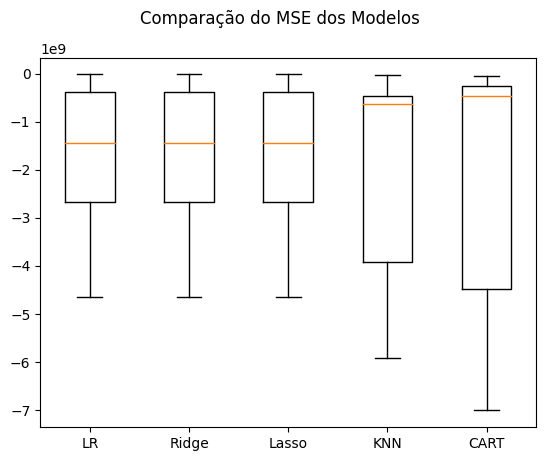

In [36]:
# Modelagem

# Definindo uma seed global para esta célula de código
np.random.seed(7)

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('LR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))

# Avaliando um modelo por vez
for name, model in models:
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
  results.append(cv_results)
  names.append(name)
  # imprime MSE, desvio padrão do MSE e RMSE dos 10 resultados da validação cruzada
  msg = "%s: MSE %0.2f (%0.2f) - RMSE %0.2f" % (name, abs(cv_results.mean()), cv_results.std(), np.sqrt(abs(cv_results.mean())))
  print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação do MSE dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

**Primeiras Conclusões**

De forma geral, o modelo que apresenta melhor resultado é aquele que gera o menor MSE e, consequentemente, o menor RMSE. Portanto, podmeos concluir que os melhores algortmos para esse modelo são LR, Ridge e Lasso.
O código abaixo cria o modelo usando esse algoritmo e todo conjunto de treino disponível. Além disso, exibe o MSE e RMSE encontrado nos resultados.

MSE: 533128181.26
RMSE: 23089.57
R2: 0.66
Equação do Modelo: y = 29.93*x0 + 0.50*x1 + 2993.55


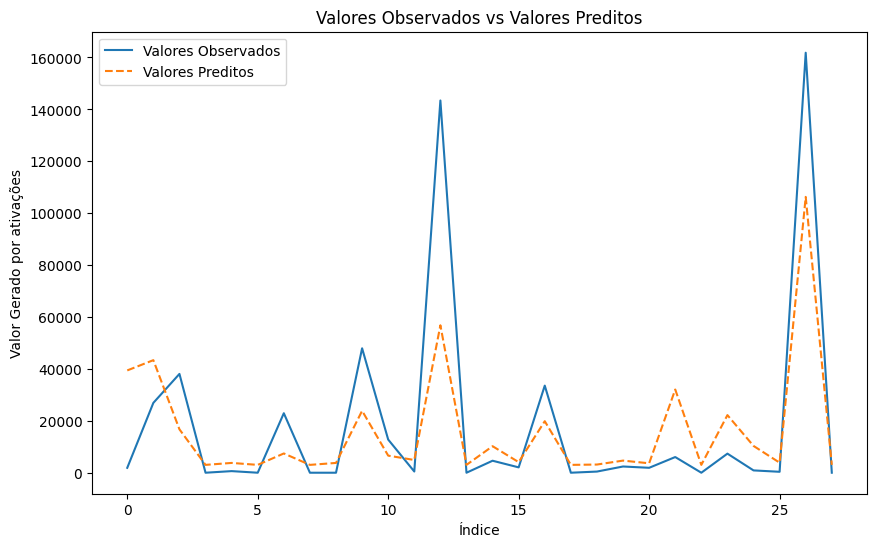

In [46]:
# Importando as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Criando um modelo com todo o conjunto de treino
model = LinearRegression()
model.fit(X_train, y_train)

# Fazendo as predições com o conjunto de teste
predictions = model.predict(X_test)

# Estimando o MSE e o RMSE no conjunto de teste
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print("MSE: %0.2f" % mse)
print("RMSE: %0.2f" % rmse)
print("R2: %0.2f" % r2)

# Obtendo os coeficientes e o intercepto do modelo
coef = model.coef_
intercept = model.intercept_

# Criando a equação do modelo
equation = "y = "
for i, c in enumerate(coef):
    equation += f"{c:.2f}*x{i} + "
equation += f"{intercept:.2f}"

print("Equação do Modelo:", equation)

# Criando o gráfico comparativo
plt.figure(figsize=(10, 6))

# Convert y3_test to a two-dimensional array
y_test = y_test.reshape(-1, 1)

plt.plot(y_test, label='Valores Observados')
plt.plot(predictions, label='Valores Preditos', linestyle='--')
plt.xlabel('Índice')
plt.ylabel('Valor Gerado por ativações')
plt.title('Valores Observados vs Valores Preditos')
plt.legend()
plt.show()

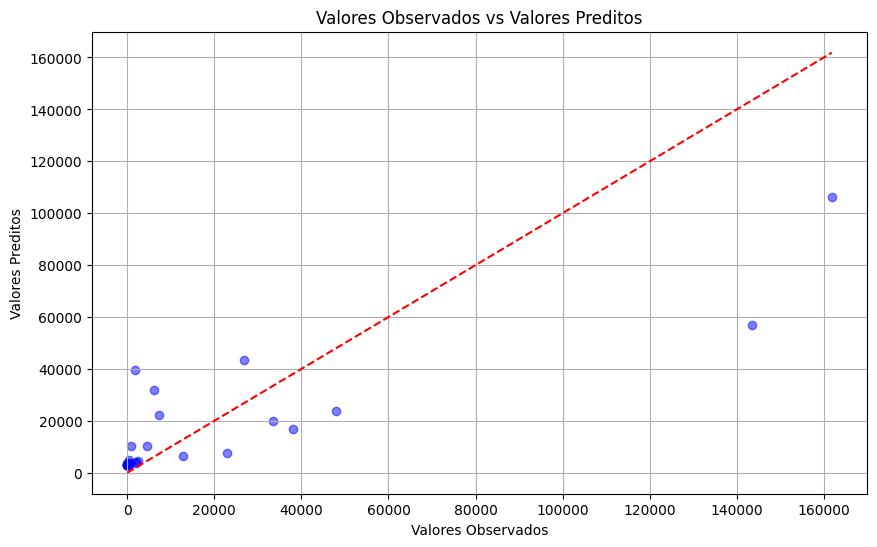

In [47]:
# Criando o gráfico dos valores observados vs valores preditos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Valores Observados')
plt.ylabel('Valores Preditos')
plt.title('Valores Observados vs Valores Preditos')
plt.grid(True)
plt.show()

In [43]:
# Try using the following to get information about your model:
print("Model coefficients:", model.coef_)
print("Model intercept:", model.intercept_)

Model coefficients: [29.931  0.495]
Model intercept: 2993.54884119533


Com base nessas informações e completando as análises de componente principais, podemos concluir que o modelo apresenta uma boa performance para ativações com baixo resultado. Além disso, o último gráfico indica que podem existir outliers nos dados que não são explicados por esse modelo.

Por fim, com base no R2, observamos que esse modelo explica cerca de 66% dos resutlados de ativação. Sendo assim, podemos afirmar que ainda existe outros atributos que podem explicar grande parte dos resultados, como copy, campanha, promoção, entre outros.


### 6.1.2 Modelos Avançados de ML

Agora, vamos testar algoritmos mais robustos e entender a sua performance.

In [44]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
# Import the necessary modules for regression models
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

LR: -1706454063.197272 (1482160423.845262)
Ridge: -1706454042.389324 (1482160422.774999)
Lasso: -1706453901.859049 (1482160385.534814)
KNN: -1934988248.961967 (2245646722.145550)
CART: -2096167814.667520 (2709038701.683494)
LR: -1706454063.197272 (1482160423.845262)
KNN: -1934988248.961967 (2245646722.145550)
CART: -1935121546.720657 (2471524203.781970)
SVR: -2797100731.909499 (3439520594.621132)
Bagging: -1875569485.556306 (1921520610.812547)
RF: -1885856434.009567 (1983955112.974176)
ET: -1556644769.453713 (1812160981.737716)
Ada: -1803289968.663188 (2103377293.312190)
GB: -1917433660.144478 (2199597374.573885)
Voting: -1700517962.952133 (1957722301.077040)


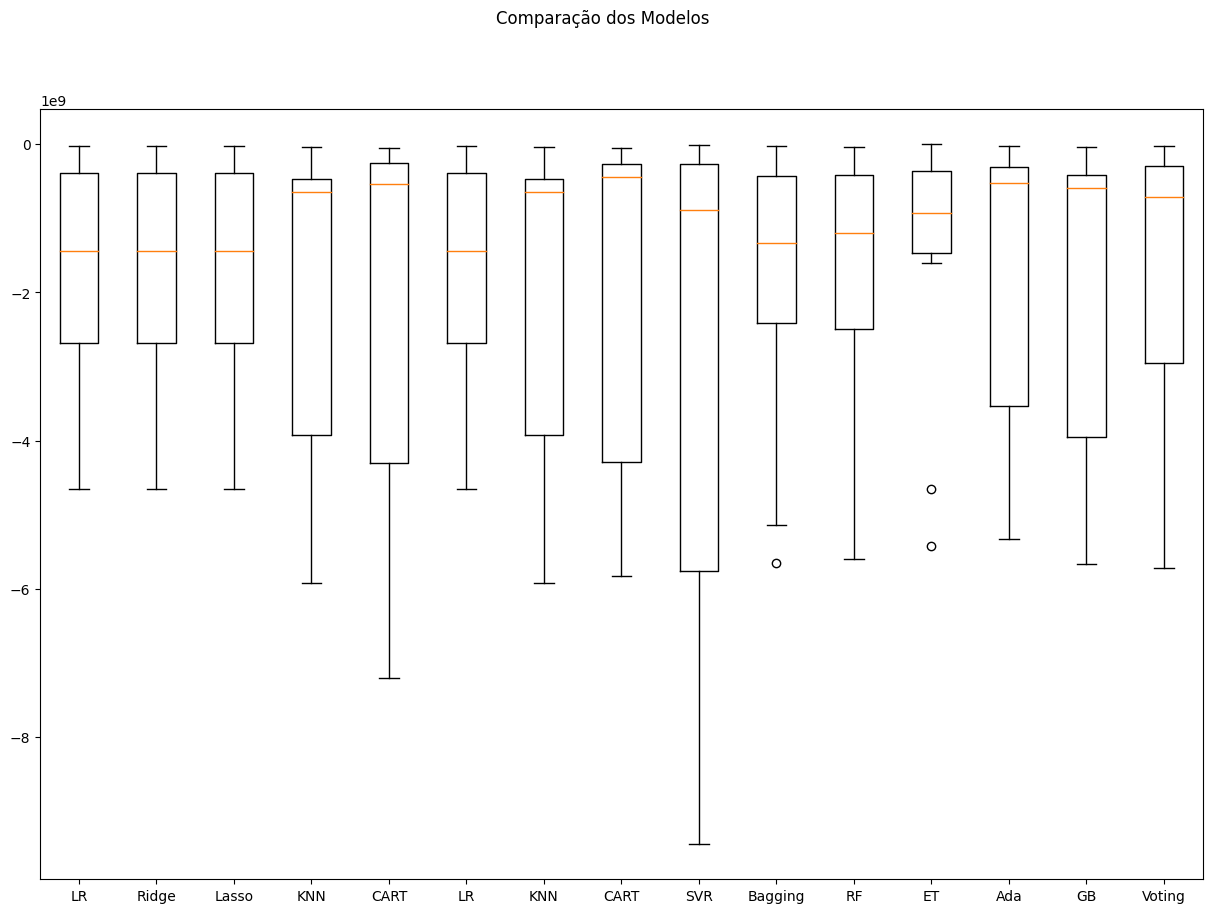

In [45]:
# Criando os modelos e adicionando-os na lista de modelos
# Use regression models instead of classification models
models.append(('LR', LinearRegression()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
# GaussianNB is not suitable for regression, consider other models like SVR
models.append(('SVR', SVR()))


# Definindo os parâmetros do classificador base para o BaggingClassifier
# Use a regression model as the base estimator
base = DecisionTreeRegressor()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
# Use regression models for VotingClassifier
bases = []
# Consider using a different regression model instead of LogisticRegression
model1 = LinearRegression()
bases.append(('linear', model1))
model2 = DecisionTreeRegressor()
bases.append(('cart', model2))


# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingRegressor(base_estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestRegressor(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesRegressor(n_estimators=num_trees, max_features=max_features)))
# AdaBoostRegressor and GradientBoostingRegressor are for regression
models.append(('Ada', AdaBoostRegressor(n_estimators=num_trees)))
models.append(('GB', GradientBoostingRegressor(n_estimators=num_trees)))
models.append(('Voting', VotingRegressor(bases)))

# Listas para armazenar os resultados
results = []
names = []

# Definindo a métrica de avaliação
# Use a regression metric like mean squared error
scoring = 'neg_mean_squared_error'

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Mesmo os algorítmos mais robustos de ML, o algoritmo de Regressão linear continua sendo o mais indicado para o modelo. Portanto, aquele é o resultado final.